In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
pd.set_option('display.max_rows', None)

In [2]:
# Load the Excel file
file_path = "cleaned_data.xlsx"

# List all sheet names (optional)
xls = pd.ExcelFile(file_path)
print("Sheet names:", xls.sheet_names)

# Load a specific sheet into a DataFrame (replace 'Sheet1' with your desired sheet name)
df = pd.read_excel(xls, sheet_name='Sheet1')

Sheet names: ['Sheet1']


In [3]:
df.head()

Unique Id       Date     Site               Region Case State  \
0  0006f2f08ab2 2024-11-11    CFHSC              US East  COMPLETED   
1  000f3913c559 2024-11-04    VCSSV  US East : Southeast  COMPLETED   
2  0010919a553c 2024-11-14  CVISDSC              US West  COMPLETED   
3  0015386a6aa2 2024-11-05   LGHASL             Illinois  COMPLETED   
4  00213dfc8ce1 2024-11-05   EHWMSE              US EAST  COMPLETED   

          CTQ Disease Burden Returned Reason  IQ Score Returned Reason2  \
0   excellent            low             NaN  0.730472              NaN   
1          ok            low             NaN  0.415275              NaN   
2   excellent            low             NaN  0.561682              NaN   
3  borderline           high             NaN  0.516929              NaN   
4          ok            low             NaN  0.377371              NaN   

  Returned Reason Group Disease Burden2  Disease_Burden_encoded       Region2  \
0                   NaN             Low                       1     US - East   
1                   NaN             Low                       1     US - East   
2                   NaN             Low                       1     US - West   
3                   NaN            High                       3  US - Central   
4                   NaN             Low                       1     US - East   

         CTQ2  CTQ2_encoded  IQ Score cleaned  
0   Excellent             3          0.730472  
1          OK             2          0.415275  
2   Excellent             3          0.561682  
3  Borderline             1          0.516929  
4          OK             2          0.377371

In [4]:
df.shape

(13536, 17)

In [5]:
df.groupby('CTQ2')['IQ Score cleaned'].describe()

count      mean       std       min       25%       50%  \
CTQ2                                                                   
Borderline  1628.0  0.422244  0.124946  0.168410  0.325140  0.407812   
Excellent   2562.0  0.625235  0.102925  0.242346  0.557166  0.628195   
OK          8084.0  0.550374  0.119882  0.177166  0.466055  0.551093   

                 75%       max  
CTQ2                            
Borderline  0.504422  0.820432  
Excellent   0.704881  0.851026  
OK          0.636530  0.840663

In [6]:
df.groupby('Disease Burden2')['IQ Score cleaned'].describe()

count      mean       std       min       25%       50%  \
Disease Burden2                                                             
High             1905.0  0.508477  0.122343  0.177464  0.420615  0.506425   
Low              6322.0  0.566015  0.132497  0.169547  0.476544  0.575089   
Moderate         4030.0  0.541333  0.126837  0.168410  0.454650  0.545206   

                      75%       max  
Disease Burden2                      
High             0.601147  0.817549  
Low              0.667101  0.851026  
Moderate         0.633760  0.840663

In [7]:
#show all CTQ by state
grouped_uniques = df.groupby('Case State')['CTQ2'].unique()
print(grouped_uniques)

Case State
COMPLETED    [Excellent, OK, Borderline, nan]
RETURNED                                [nan]
Name: CTQ2, dtype: object


In [8]:
#show all Disease Burden by state
grouped_uniques = df.groupby('Case State')['Disease Burden2'].unique()
print(grouped_uniques)

Case State
COMPLETED    [Low, High, Moderate, nan]
RETURNED                          [nan]
Name: Disease Burden2, dtype: object


In [9]:
df = df[df['Case State'] == 'COMPLETED']

In [10]:
df.shape

(12290, 17)

In [11]:
zero_count = (df['CTQ2_encoded'] == 0).sum()
print(f"\nNumber of 0s (missing data) in CTQ2_encoded: {zero_count} - {100 * (zero_count/df.shape[0]):.2f}% ")


Number of 0s (missing data) in CTQ2_encoded: 16 - 0.13% 


In [12]:
zero_count = (df['Disease_Burden_encoded'] == 0).sum()
print(f"\nNumber of 0s (missing data) in Disease_Burden_encoded: {zero_count} - {100 * (zero_count/df.shape[0]):.2f}% ")


Number of 0s (missing data) in Disease_Burden_encoded: 33 - 0.27% 


## replace missing data with median

In [13]:
db = df[df['Disease_Burden_encoded'].isin([1, 2, 3])]
ctq = df[df['CTQ2_encoded'].isin([1, 2, 3])]

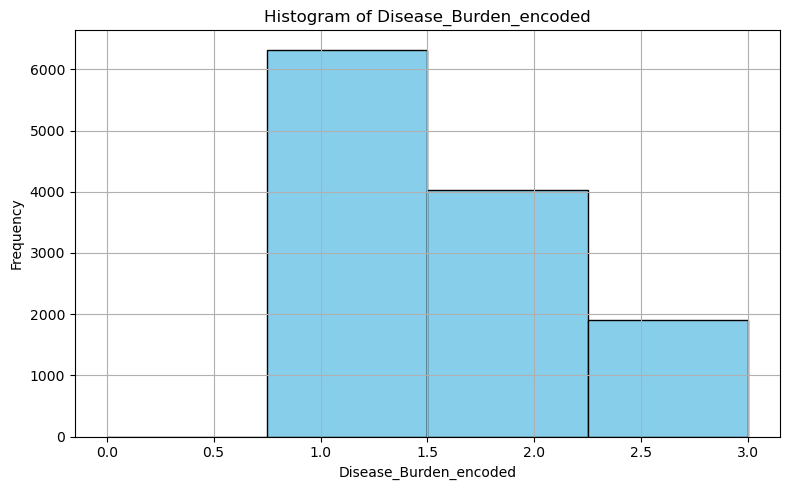

median: 1.0 


In [14]:

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(db['Disease_Burden_encoded'], bins=4, range=(0, 3), color='skyblue', edgecolor='black')
plt.title('Histogram of Disease_Burden_encoded')
plt.xlabel('Disease_Burden_encoded')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"median: {(df['Disease_Burden_encoded'] != 0).median()} ")

In [15]:
df['Disease_Burden_encoded'] = df['Disease_Burden_encoded'].replace(0, (df['Disease_Burden_encoded'] != 0).median())

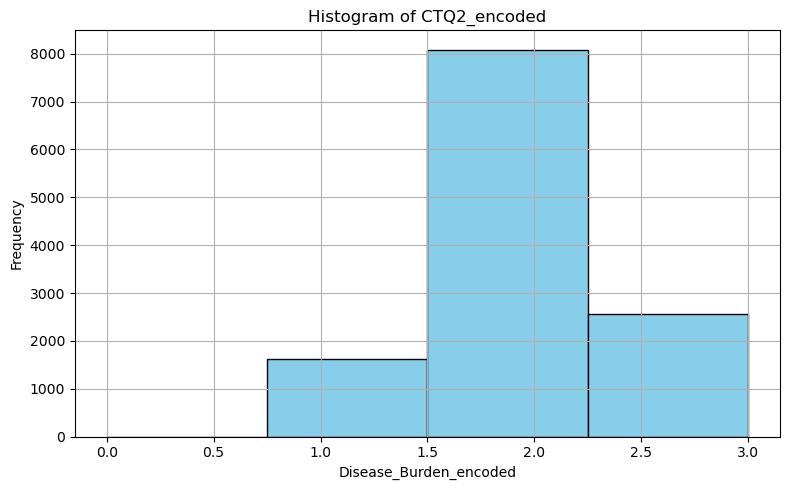

median: 1.0 


In [16]:

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(ctq['CTQ2_encoded'], bins=4, range=(0, 3), color='skyblue', edgecolor='black')
plt.title('Histogram of CTQ2_encoded')
plt.xlabel('Disease_Burden_encoded')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"median: {(df['Disease_Burden_encoded'] != 0).median()} ")

In [17]:
df['CTQ2_encoded'] = df['CTQ2_encoded'].replace(0, (df['CTQ2_encoded'] != 0).median())

# How does the CTQ assessment relate to the IQ scores

In [18]:
df.groupby('CTQ2')['IQ Score cleaned'].describe()

count      mean       std       min       25%       50%  \
CTQ2                                                                   
Borderline  1628.0  0.422244  0.124946  0.168410  0.325140  0.407812   
Excellent   2562.0  0.625235  0.102925  0.242346  0.557166  0.628195   
OK          8084.0  0.550374  0.119882  0.177166  0.466055  0.551093   

                 75%       max  
CTQ2                            
Borderline  0.504422  0.820432  
Excellent   0.704881  0.851026  
OK          0.636530  0.840663

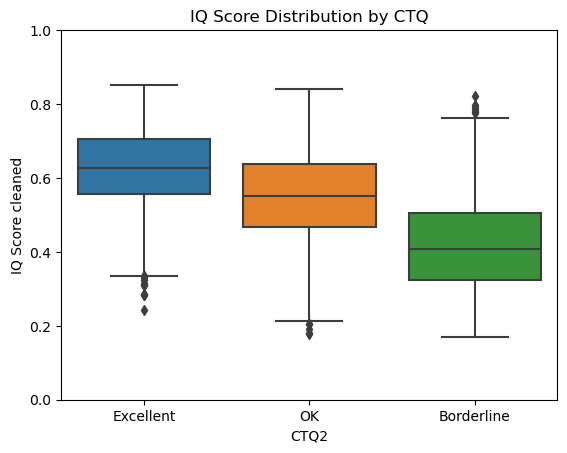

In [19]:
sns.boxplot(x='CTQ2', y='IQ Score cleaned', data=df)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.title('IQ Score Distribution by CTQ')
plt.show()

- Clear Positive Correlation: Higher CTQ is associated with higher IQ Scores. As CTQ drops to OK and Borderline, the median and overall IQ Scores decrease.
- Excellent CTQ shows a tighter distribution, suggesting consistent image quality.
- Borderline has a wider spread, which indicates more variability and poorer image quality.
- CTQ is strongly aligned with the quantitative IQ Score â€” confirming that the visual CT quality rating by analysts matches the IQ Score output


# How does the Disease Burden assessment relate to the IQ scores

In [20]:
df.groupby('Disease Burden2')['IQ Score cleaned'].describe()

count      mean       std       min       25%       50%  \
Disease Burden2                                                             
High             1905.0  0.508477  0.122343  0.177464  0.420615  0.506425   
Low              6322.0  0.566015  0.132497  0.169547  0.476544  0.575089   
Moderate         4030.0  0.541333  0.126837  0.168410  0.454650  0.545206   

                      75%       max  
Disease Burden2                      
High             0.601147  0.817549  
Low              0.667101  0.851026  
Moderate         0.633760  0.840663

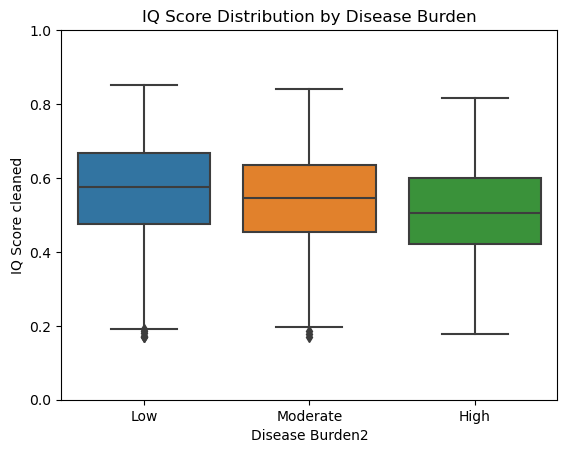

In [21]:
sns.boxplot(x='Disease Burden2', y='IQ Score cleaned', data=df, order=['Low', 'Moderate', 'High'])
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.title('IQ Score Distribution by Disease Burden')
plt.show()

- Cases with low disease burden tend to have higher scores on average.
- As the disease burden goes from low to moderate to high, the scores go down steadily; so, the worse the burden, the lower the typical score. 
- This suggests a negative correlation between disease burden level and the outcome score. However, the variabilities suggest that the correlation are not that cleared.


Correlation matrix:

                        IQ Score cleaned  CTQ2_encoded  Disease_Burden_encoded
IQ Score cleaned                    1.00          0.43                   -0.16
CTQ2_encoded                        0.43          1.00                   -0.24
Disease_Burden_encoded             -0.16         -0.24                    1.00


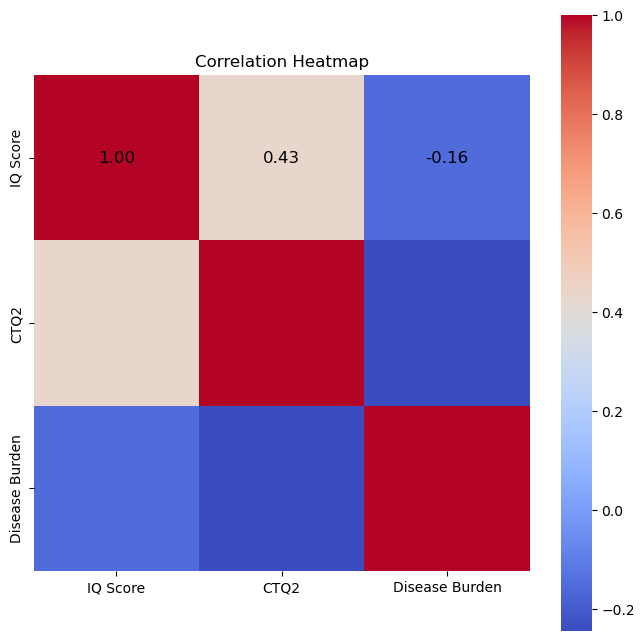

In [22]:

# Select numeric columns
corr_df = df[['IQ Score cleaned', 'CTQ2_encoded', 'Disease_Burden_encoded']]

# Compute correlation
corr = corr_df.corr()

# Print correlation values 
print("\nCorrelation matrix:\n")
print(corr.round(2))

# Rename index/columns for pretty labels
pretty_labels = ['IQ Score', 'CTQ2', 'Disease Burden']
corr.index = pretty_labels
corr.columns = pretty_labels

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    annot_kws={"size": 12, "color": "black"},  # makes sure text is visible
    xticklabels=pretty_labels,
    yticklabels=pretty_labels
)
plt.title('Correlation Heatmap')
plt.show()

- The correlation between IQ Score and CTQ2 is 0.43, meaning there is a moderate positive correlation between these two variables.

- The correlation between IQ Score and Disease Burden is -0.16, indicating a very weak negative correlation.

- The correlation between CTQ and Disease Burden is -0.24, showing a weak negative correlation between these two variables.

- In conclusion,
    - CTQ assessment demonstrate moderate but partially positive relationship to IQ score.
    - Disease burden demonstrates weaker relationship to IQ score
    - Overall, the IQ score is more closely aligned with CTQ than with disease burden.